Student Name:	AIDAN KEESHAN
Student ID:	18200117

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

rfcc = pd.read_csv('data/kag_risk_factors_cervical_cancer.csv', na_values = ['?'])

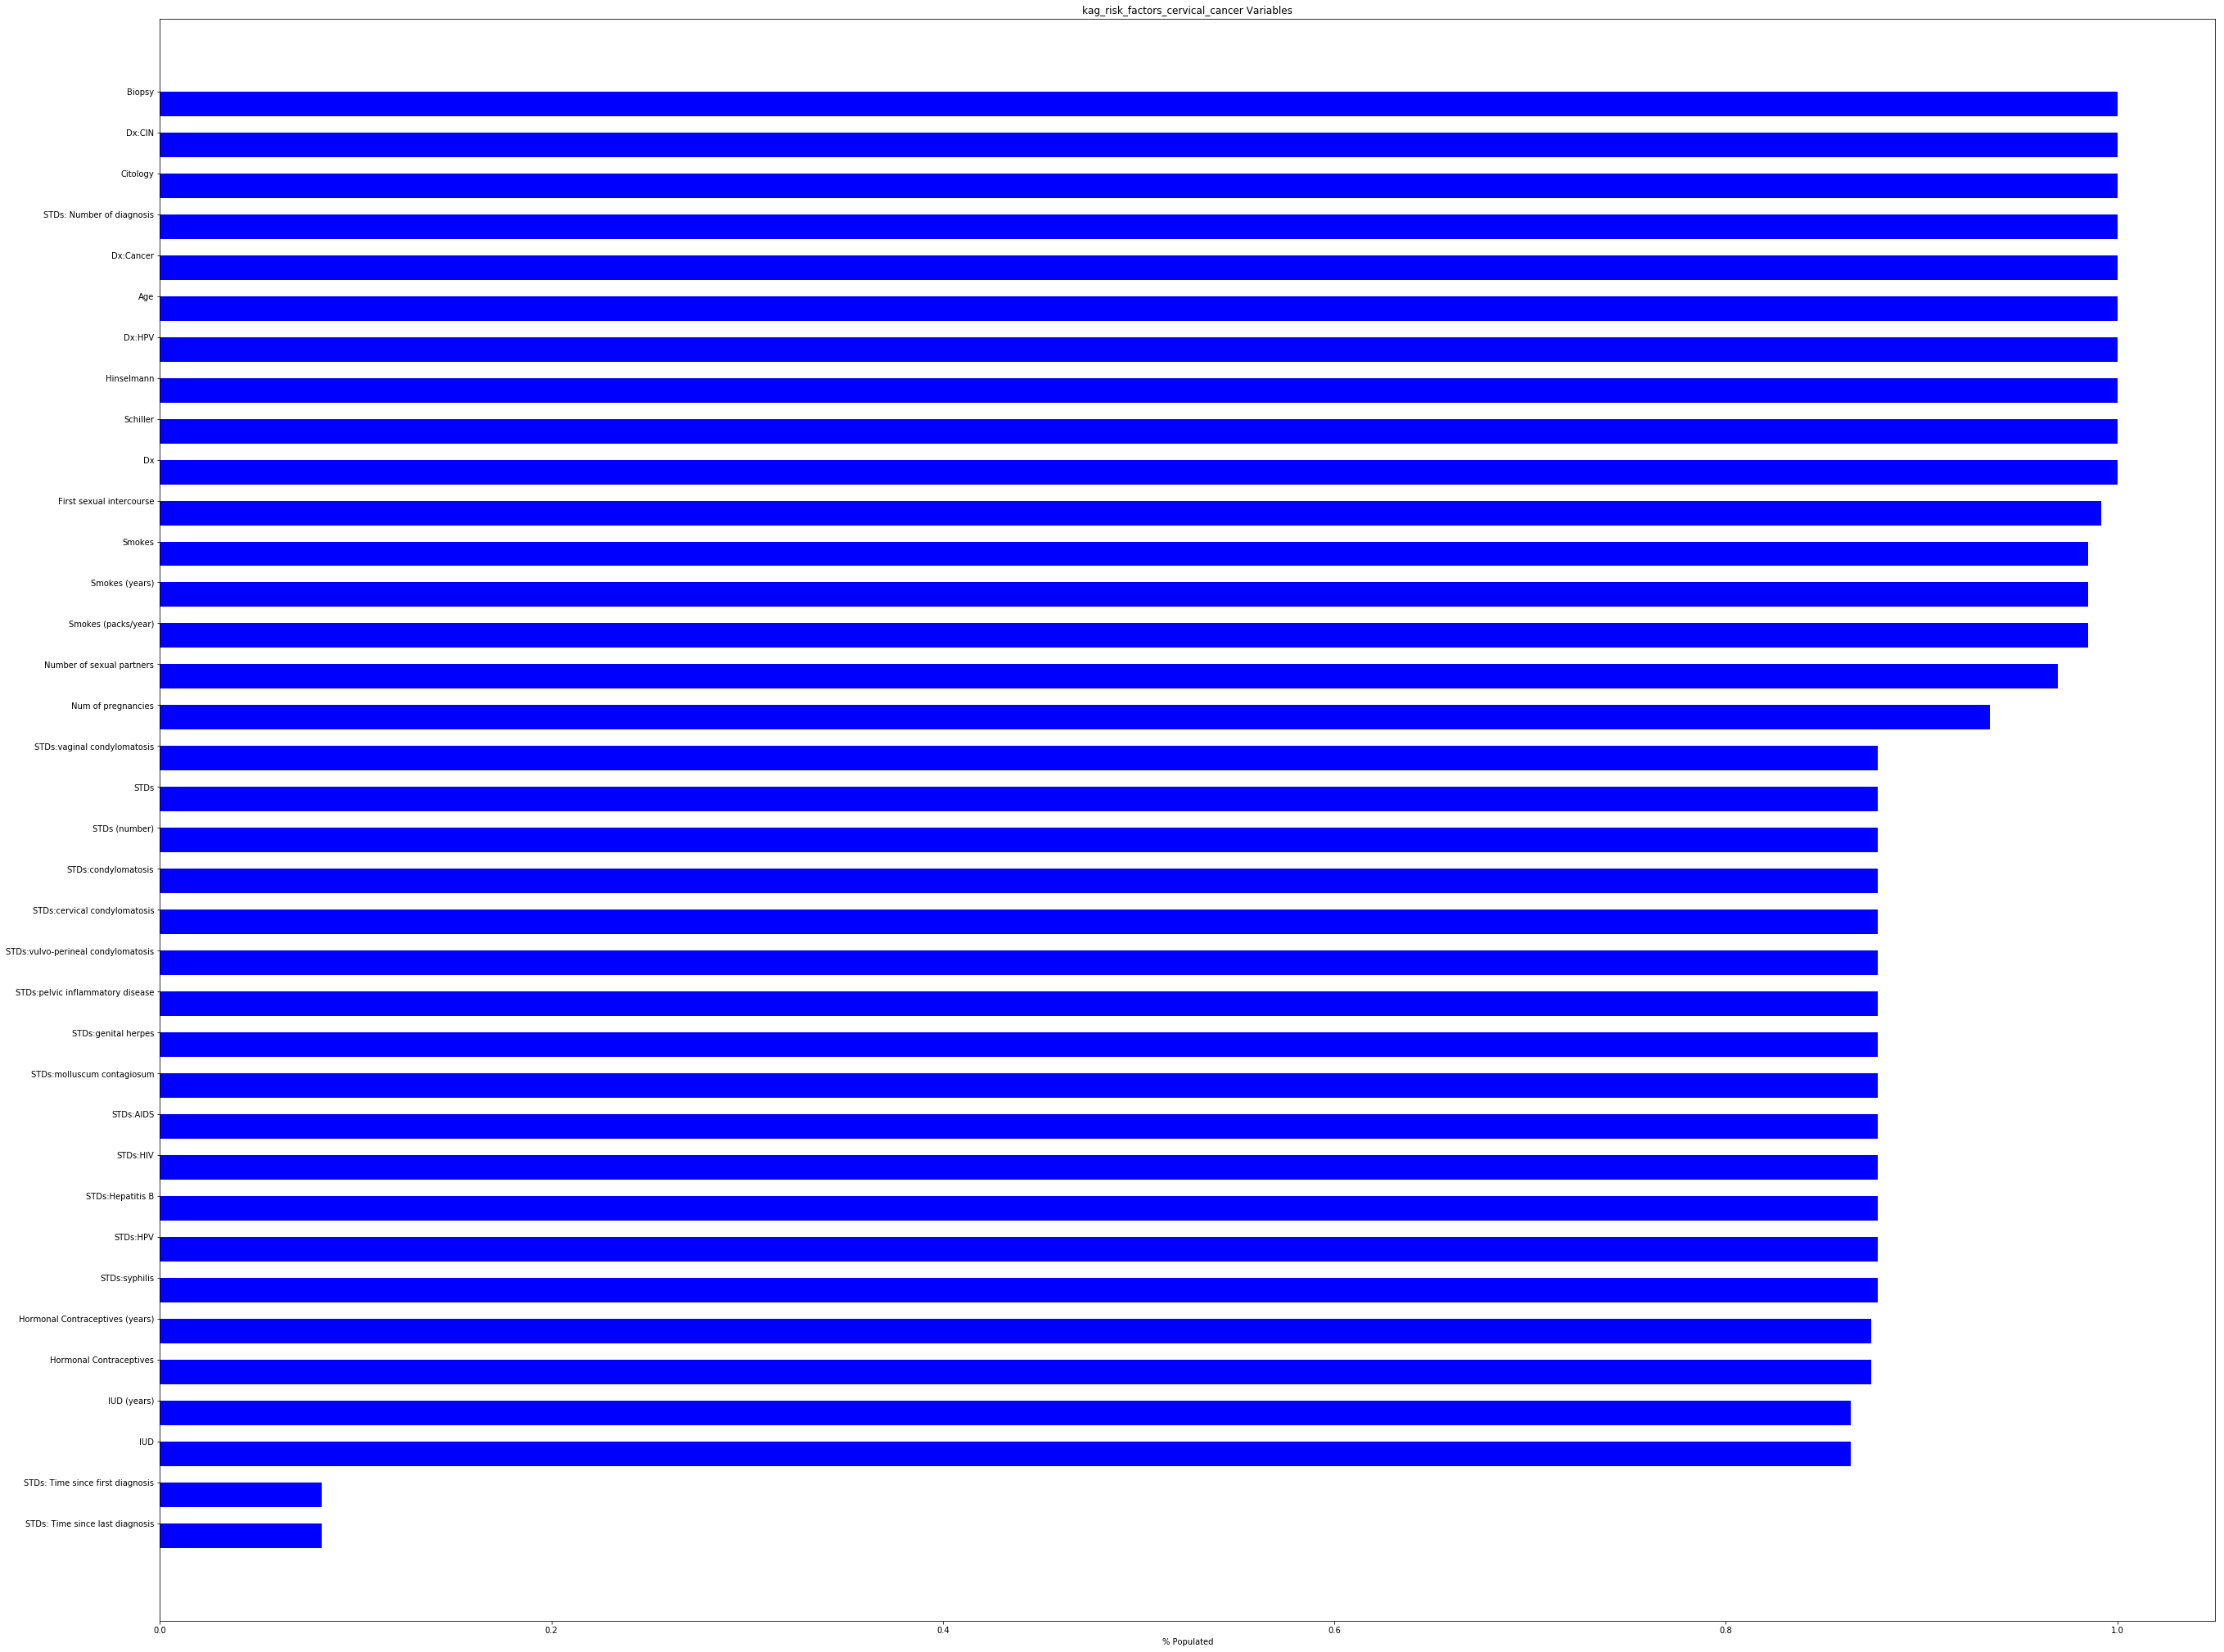

In [2]:
def summary_df(df,title='Data Varaible'):
    summary = (len(df) - df.isnull().sum())/len(df)
    summary = pd.DataFrame({'VARNAME' : summary.index.values, 'VARNULLPER': summary.reset_index(drop=True)}).sort_values(by=['VARNULLPER'])
    fig, ax = plt.subplots(figsize=(45, 36)) 
    width = 0.6 # the width of the bars 
    ind = np.arange(len(summary))  # the x locations for the groups
    ax.barh(ind, summary['VARNULLPER'], width, color="blue")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(summary['VARNAME'], minor=False)
    plt.title(title)
    plt.xlabel('% Populated')
    #fig.close()
    plt.show()
    return summary

rfcc_summary = summary_df(rfcc,'kag_risk_factors_cervical_cancer Variables')

In [3]:
corr_mat = rfcc.corr()
corr_mat = corr_mat.replace(1, 0)
max_corr = corr_mat.abs().max().replace(np.nan, 0).sort_values(ascending=False)
high_low = np.split(max_corr.index.values, 2)
high_low

[array(['STDs:vulvo-perineal condylomatosis', 'STDs:condylomatosis',
        'STDs: Time since last diagnosis',
        'STDs: Time since first diagnosis', 'STDs (number)', 'STDs',
        'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:HPV', 'IUD',
        'IUD (years)', 'Schiller', 'Biopsy', 'Smokes (years)',
        'Smokes (packs/year)', 'Smokes', 'Dx', 'Hinselmann'], dtype=object),
 array(['Dx:CIN', 'Num of pregnancies', 'Age', 'STDs:HIV', 'STDs:syphilis',
        'Hormonal Contraceptives (years)', 'Hormonal Contraceptives',
        'First sexual intercourse', 'Citology',
        'STDs:vaginal condylomatosis', 'STDs:HPV', 'STDs:Hepatitis B',
        'Number of sexual partners', 'STDs:genital herpes',
        'STDs:pelvic inflammatory disease', 'STDs:molluscum contagiosum',
        'STDs:cervical condylomatosis', 'STDs:AIDS'], dtype=object)]

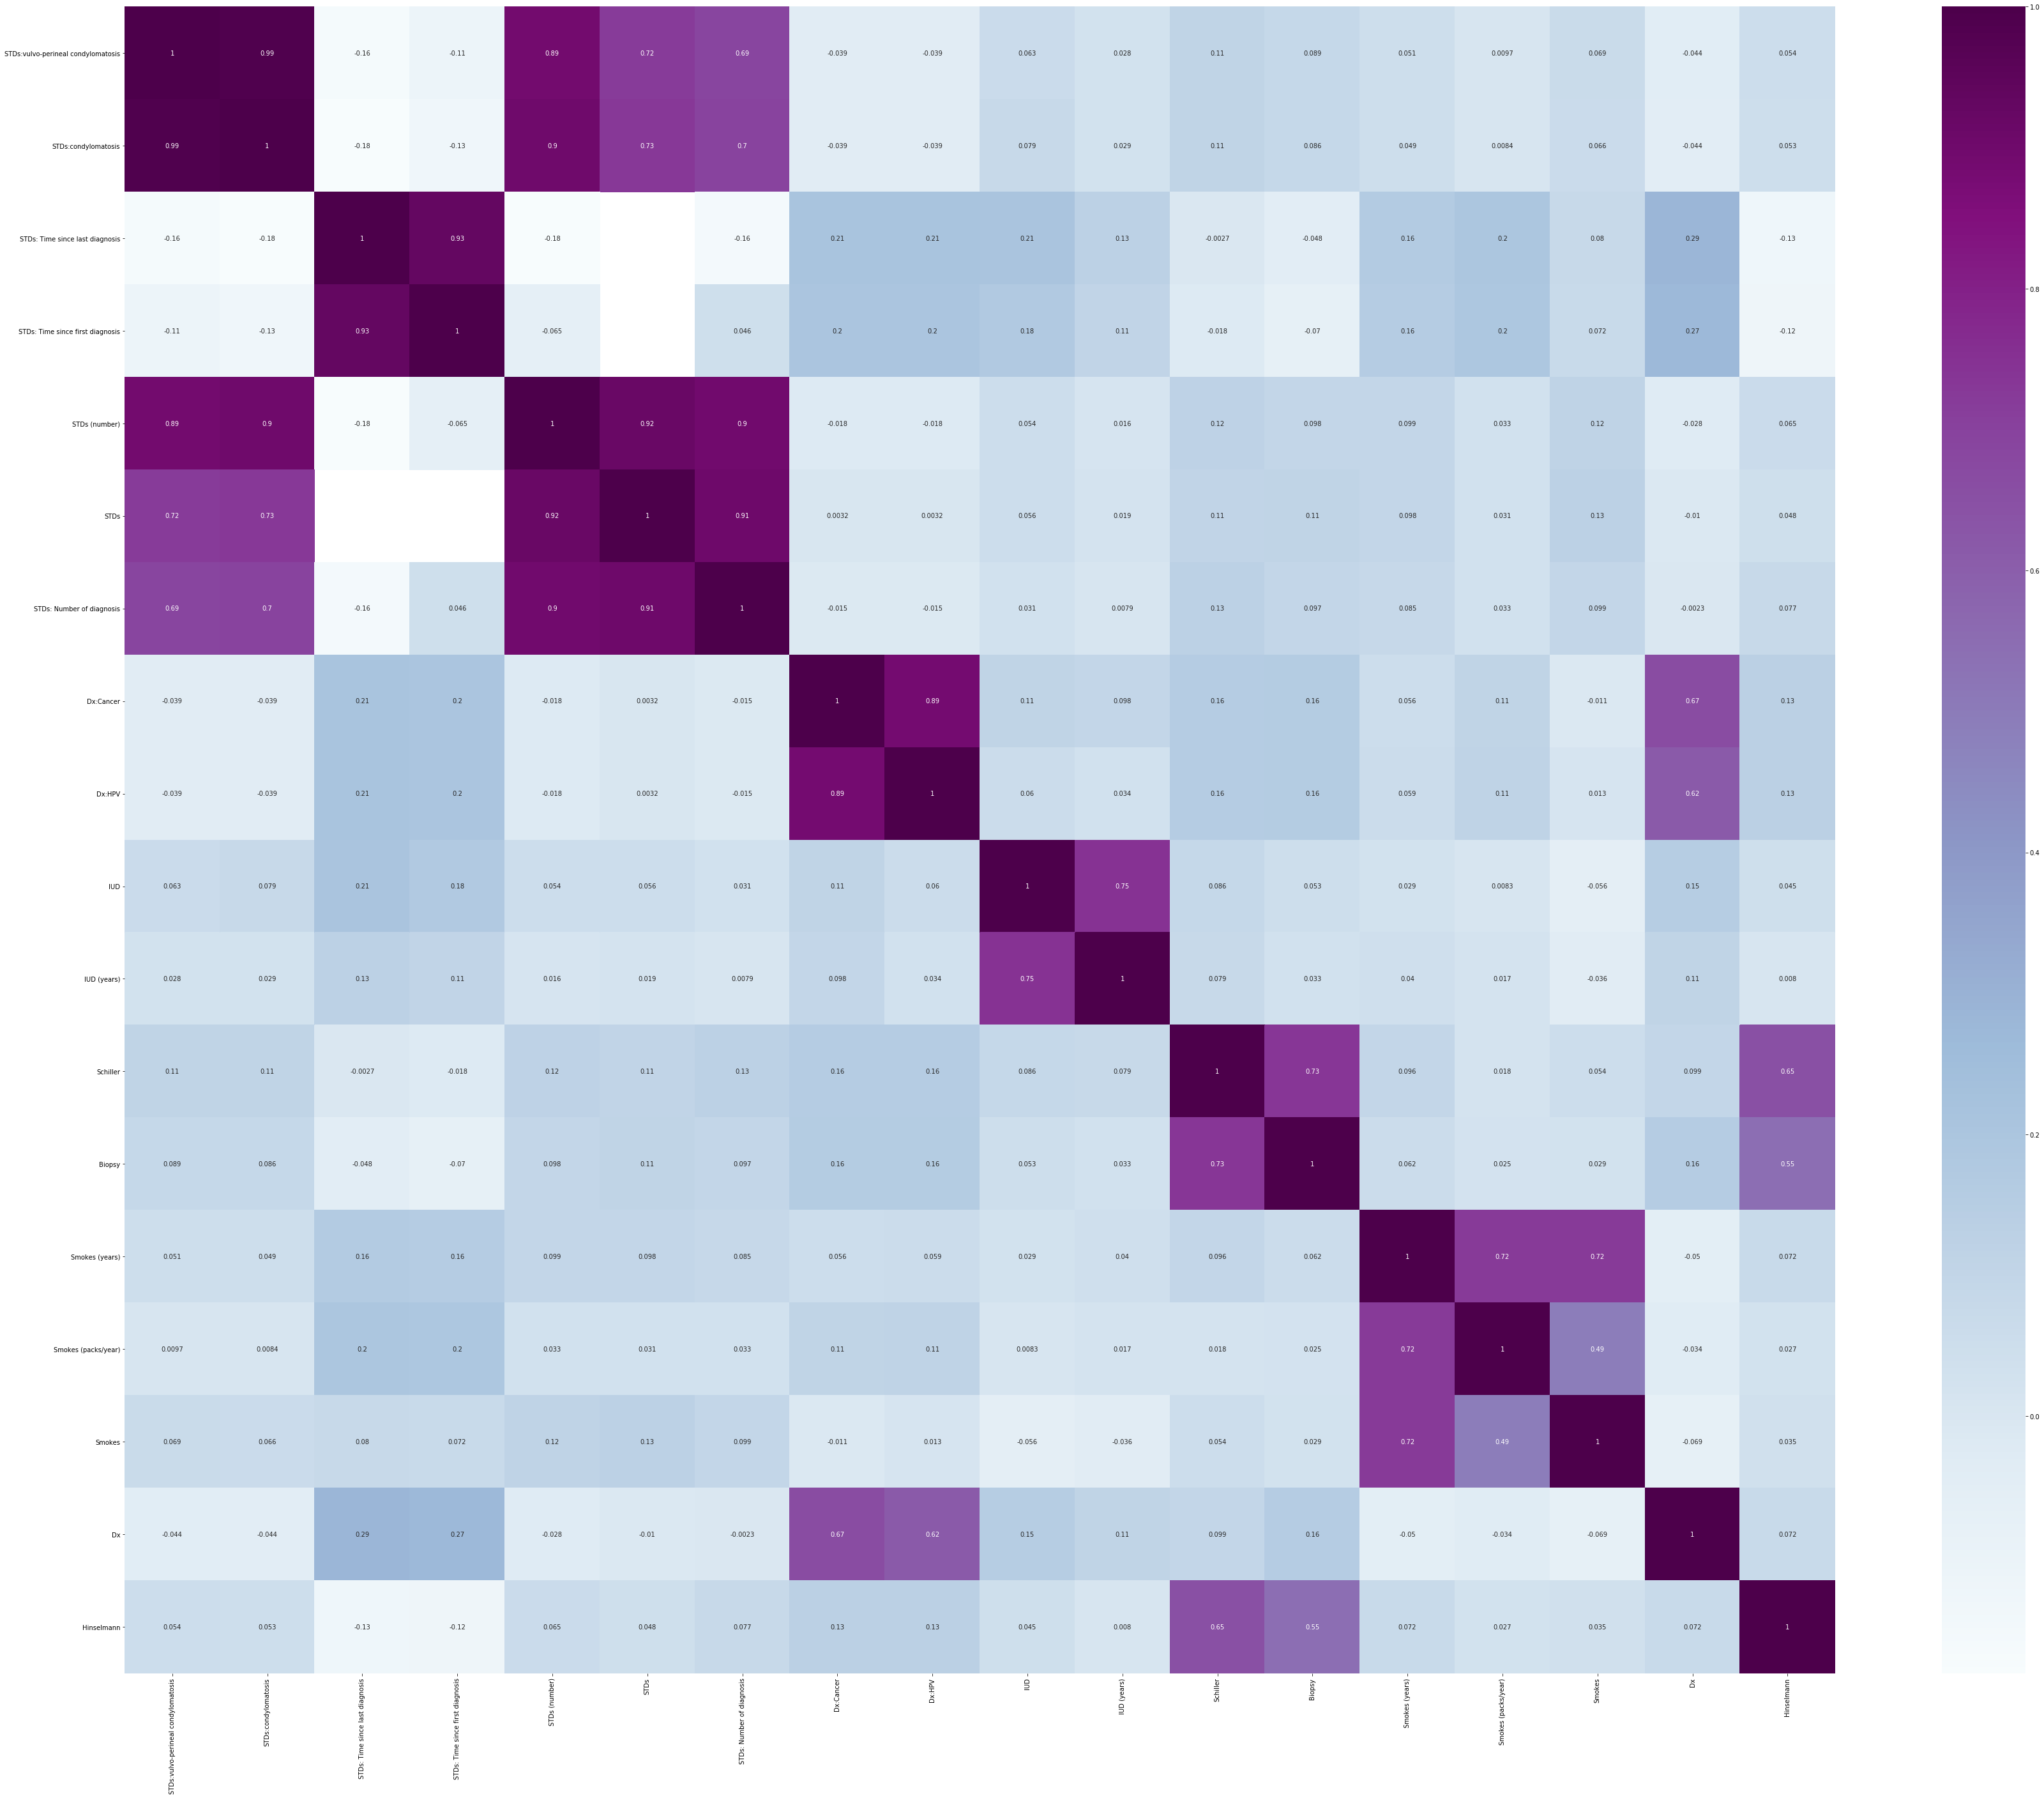

In [4]:
import seaborn as sn
fig, ax = plt.subplots(figsize=(60, 48))
plot = sn.heatmap(rfcc[high_low[0]].corr(), annot=True, cmap='BuPu', ax=ax)


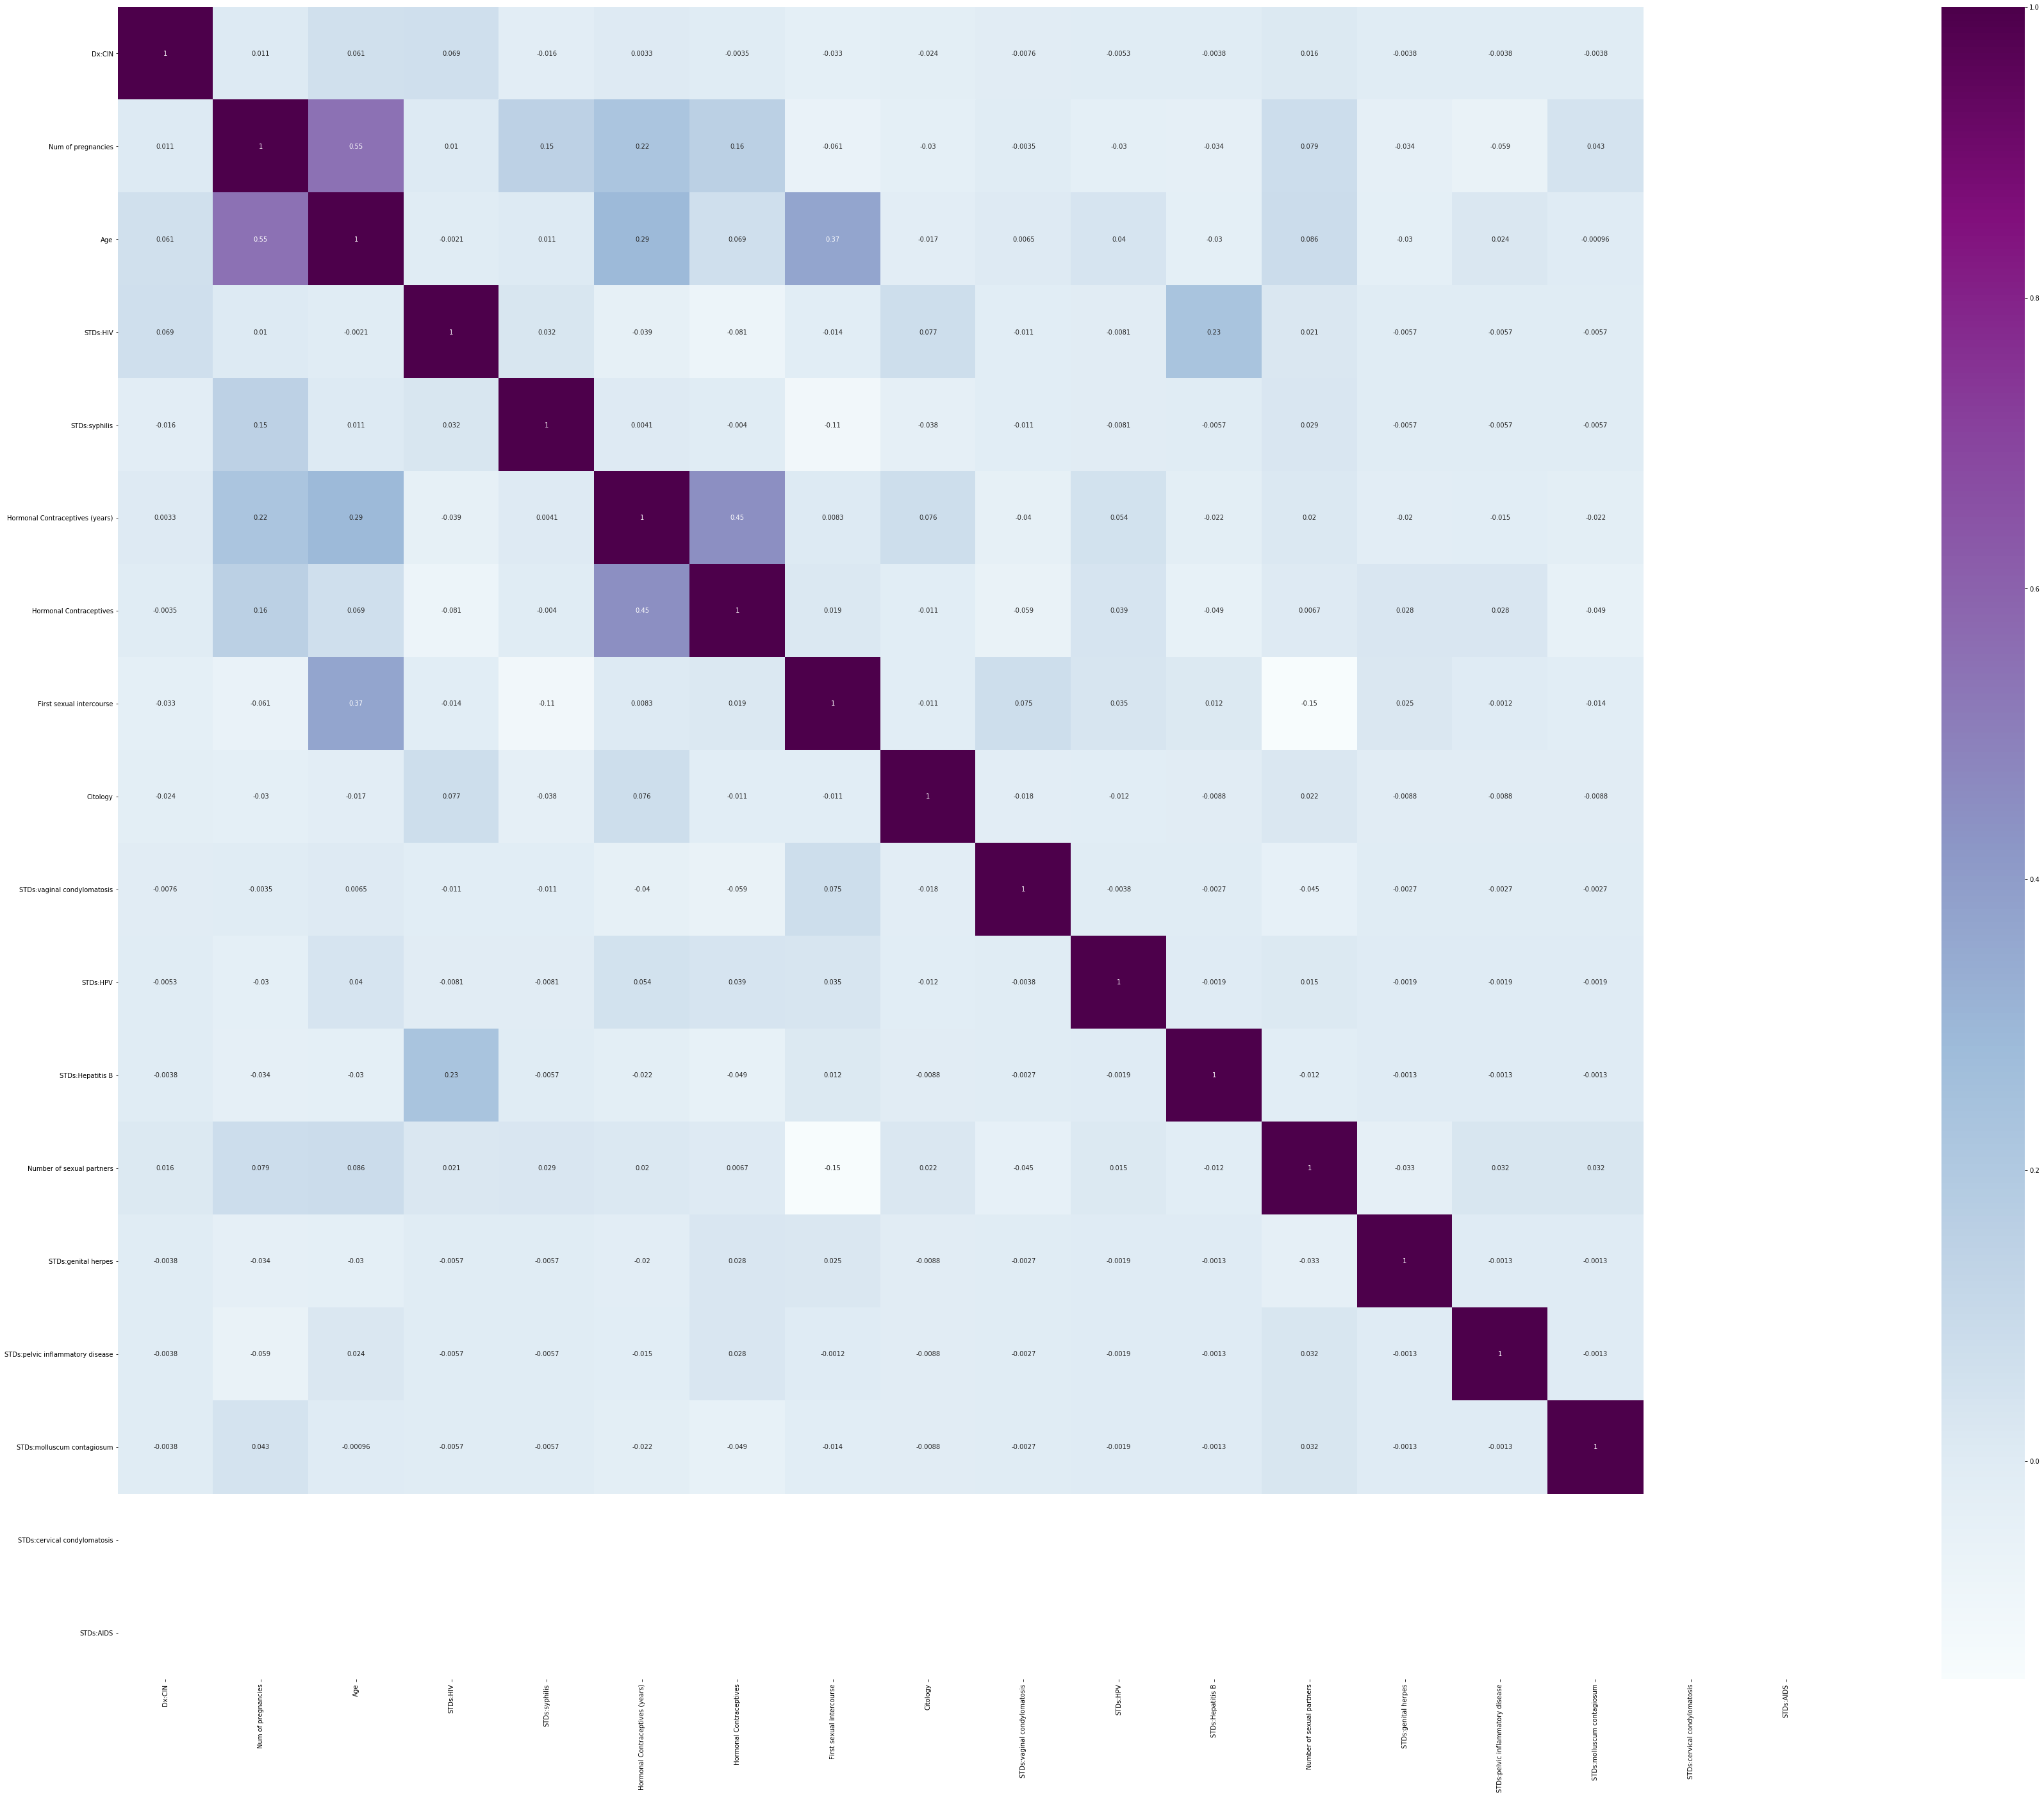

In [5]:
fig, ax = plt.subplots(figsize=(60, 48))
plot = sn.heatmap(rfcc[high_low[1]].corr(), annot=True, cmap='BuPu', ax=ax)

In [6]:
rfcc_null_zero = rfcc.replace(np.nan, 0).copy()
def apply_null(df,cutoff=0):
    df_return = df.copy()
    for i, row  in rfcc_summary.iterrows():
        if row['VARNULLPER'] <= cutoff:
            df_return = df_return.drop(row['VARNAME'],1)
        elif row['VARNULLPER'] != 1:
            df_return[row['VARNAME']].fillna((df_return[row['VARNAME']].mean()), inplace=True)
    return df_return

rfcc_null_mean = apply_null(rfcc)
rfcc_null_mean_co = apply_null(rfcc,0.2)
print (rfcc_null_mean.shape)
print (rfcc_null_mean_co.shape)

(858, 36)
(858, 34)


In [40]:
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def split_data(df,target):
    y = np.array(df[target])
    X = df.drop(target, 1)
    X = X.replace(np.nan, 0)
    return train_test_split(X, y, test_size=0.33, random_state=42)

def plot_confusion_matrix(y_test, y_pred,title = 'Title'):
    conf_mat = confusion_matrix(y_test, y_pred)
    log_norm = LogNorm(vmin=conf_mat.min().min(), vmax=conf_mat.max().max())
    #plt.figure()
    #ax = plt.axes()
    sn.heatmap(conf_mat,cmap="Blues",annot=True,fmt='g',norm=log_norm)
    #ax.set_title(title)
    #plt.figure()



0.9964788732394366


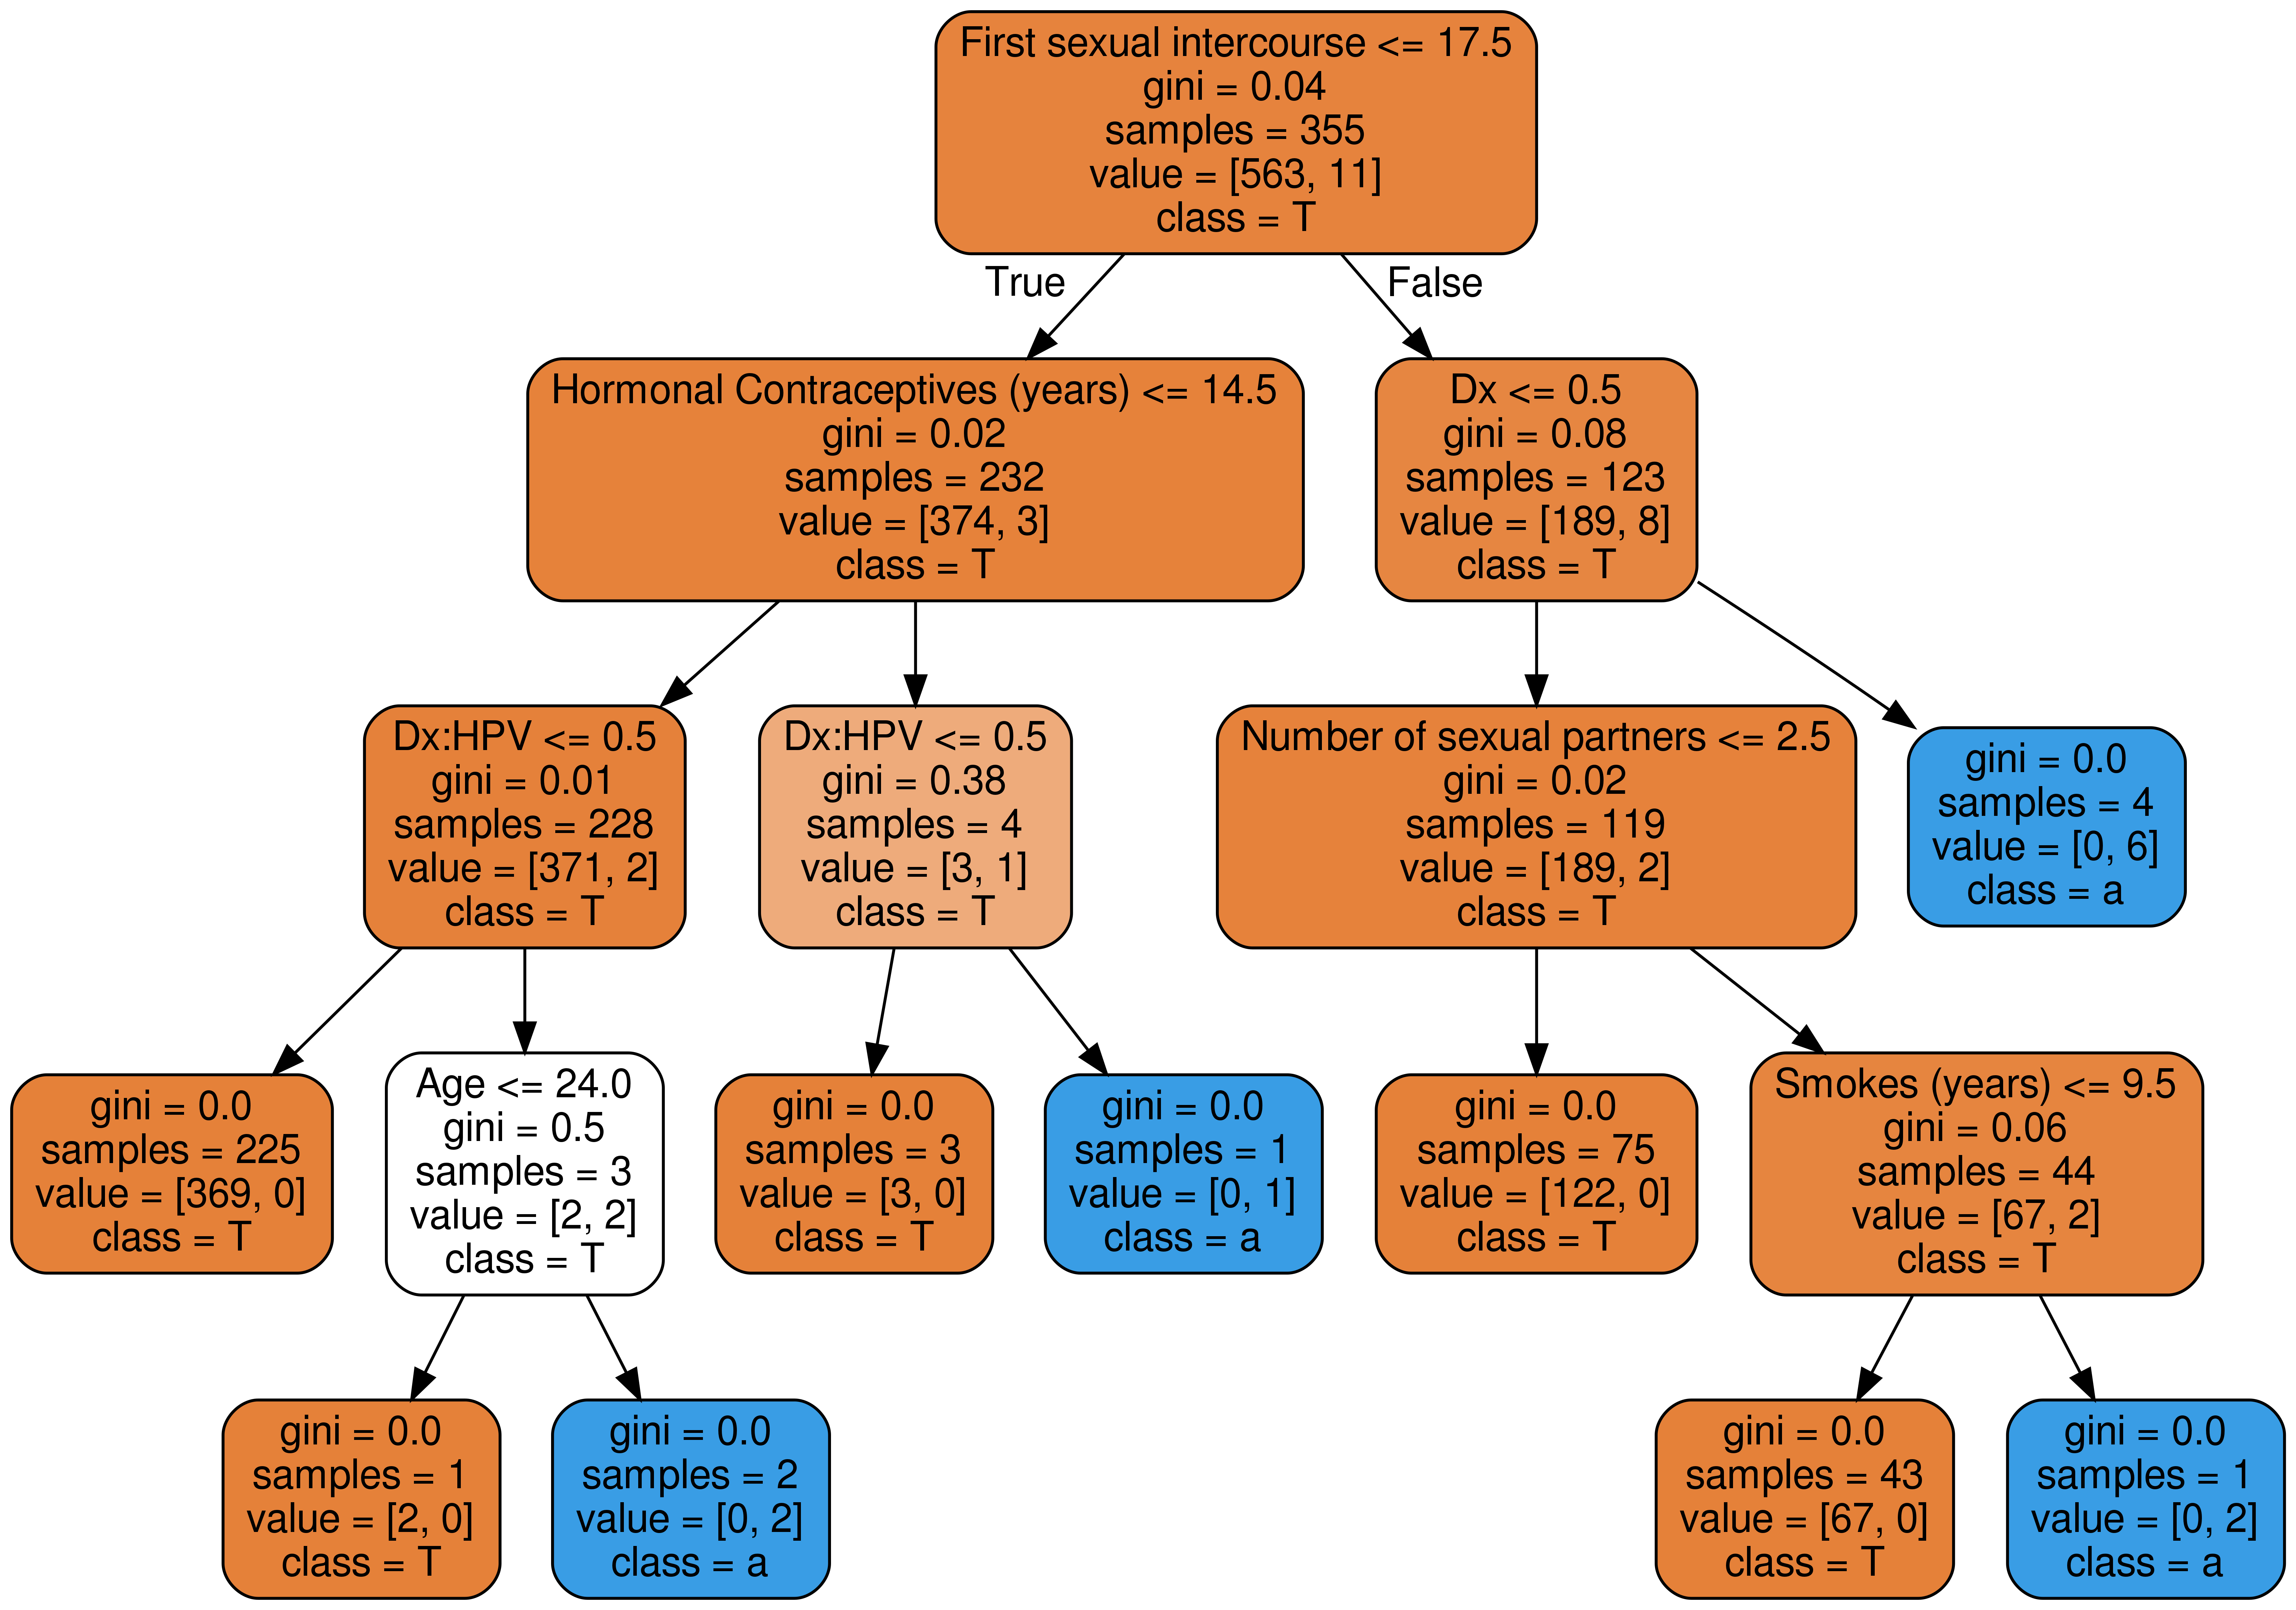

In [77]:
X_train, X_test, y_train, y_test,model = None,None,None,None,None
X_train, X_test, y_train, y_test = split_data(rfcc_null_mean_co,'Dx:Cancer')
model = RandomForestClassifier(n_estimators = 200)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print (score)
#plot_confusion_matrix(y_test, y_pred,'Model Accuracy: {:.1%}'.format(score))
estimator = model.estimators_[42]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = 'Target',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [75]:
X_train.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'Dx:CIN',
       'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')

In [50]:
X_train, X_test, y_train, y_test = split_data(rfcc_null_mean,'Dx:Cancer')
model = RandomForestClassifier(n_estimators = 200)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print (score)

0.9929577464788732


0.9929577464788732


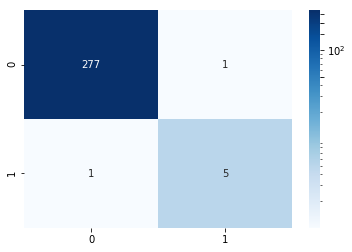

In [51]:
X_train, X_test, y_train, y_test,model = None,None,None,None,None
X_train, X_test, y_train, y_test = split_data(rfcc_null_mean_co,'Dx:Cancer')
model = RandomForestClassifier(n_estimators = 200)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print (score)
plot_confusion_matrix(y_test, y_pred,'Model Accuracy: {:.1%}'.format(score))

In [55]:
param_grid = [
        {'bootstrap': [False, True],
         'n_estimators': [80,90, 100, 110, 130,200],
         'max_features': [0.6, 0.65, 0.7, 0.73, 0.7500000000000001, 0.78, 0.8],
         'min_samples_leaf': [10, 12, 14],
         'min_samples_split': [3, 5, 7]
        },
    ]

X_train, X_test, y_train, y_test = split_data(rfcc_null_zero,'Dx:Cancer')
random_forest_classifier = RandomForestClassifier()
grid_search = GridSearchCV(random_forest_classifier, param_grid, cv=5,scoring='neg_mean_squared_error', refit=True,n_jobs=8)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
#plot_confusion_matrix(y_test, y_pred,'Model Accuracy: {:.1%}'.format(score))
print (score)

0.9929577464788732


In [69]:
X_train, X_test, y_train, y_test = split_data(rfcc_null_zero,'Dx:Cancer')
from sklearn.decomposition import PCA 
pca = PCA()
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

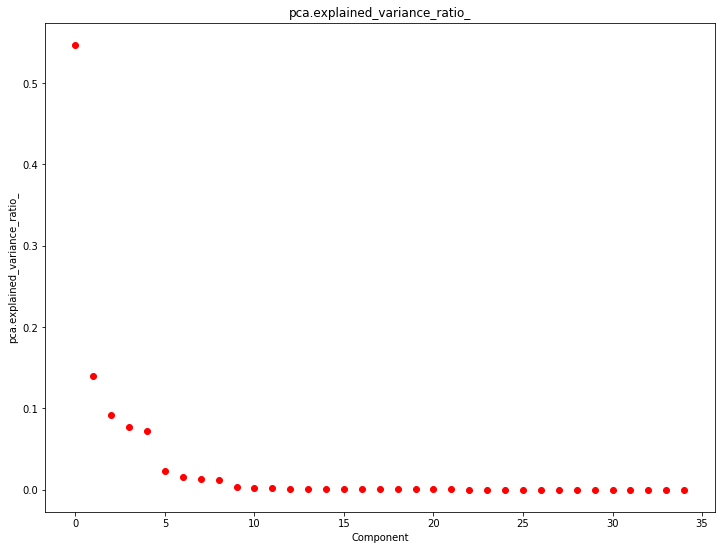

The explained variance ratio shows how much each component contributes to overall variance.
The total overall variance is 1.0
The first component of the PCA analysis contributes over 25% of the total variance
After about 20 components, the amount of variance contributed by each component starts getting to 1% or less


In [70]:
# Adjust Size of Figures
plt.rcParams["figure.figsize"] = (12,9)


plt.title('pca.explained_variance_ratio_')
plt.ylabel('pca.explained_variance_ratio_')
plt.xlabel('Component')
plt.plot(pca.explained_variance_ratio_, 'or')
plt.show()

print("The explained variance ratio shows how much each component contributes to overall variance.")
print("The total overall variance is 1.0")
print("The first component of the PCA analysis contributes over 25% of the total variance")
print("After about 20 components, the amount of variance contributed by each component starts getting to 1% or less")